In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("madhukk23/my-splits-dataset")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/my-splits-dataset


In [2]:
import os

def print_folder_structure_with_counts(root_dir):
    for dirpath, dirnames, filenames in os.walk(root_dir):
        level = dirpath.replace(root_dir, '').count(os.sep)
        indent = ' ' * 4 * level
        print(f"{indent}{os.path.basename(dirpath)}/ ({len(filenames)} files)")

# Path to the dataset
dataset_path = "/kaggle/input/my-splits-dataset"
print_folder_structure_with_counts(dataset_path)


my-splits-dataset/ (0 files)
    split_70_30/ (0 files)
        test/ (0 files)
            Alternaria_Leaf_Spot/ (60 files)
            club root/ (60 files)
            Downy Mildew/ (60 files)
            Cabbage aphid colony/ (60 files)
            ring spot/ (60 files)
            Black Rot/ (60 files)
            Bacterial spot rot/ (60 files)
            No disease/ (60 files)
        train/ (0 files)
            Alternaria_Leaf_Spot/ (140 files)
            club root/ (140 files)
            Downy Mildew/ (140 files)
            Cabbage aphid colony/ (140 files)
            ring spot/ (140 files)
            Black Rot/ (140 files)
            Bacterial spot rot/ (140 files)
            No disease/ (140 files)
    split_50_50/ (0 files)
        test/ (0 files)
            Alternaria_Leaf_Spot/ (100 files)
            club root/ (100 files)
            Downy Mildew/ (100 files)
            Cabbage aphid colony/ (100 files)
            ring spot/ (100 files)
            Black Rot/

In [3]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.inception_v3 import InceptionV3, preprocess_input
from tensorflow.keras import layers, models
import os

# Define paths
base_dir = "/kaggle/input/my-splits-dataset/split_60_40"
train_dir = os.path.join(base_dir, "train")
val_dir = os.path.join(base_dir, "test")

# Parameters
IMAGE_SIZE = (299, 299)  # Required for InceptionV3
BATCH_SIZE = 32
NUM_CLASSES = 8

# Data Generators
train_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=20,
    zoom_range=0.2,
    horizontal_flip=True
)

val_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input
)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

# Load InceptionV3 base model without top layers
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=IMAGE_SIZE + (3,))
base_model.trainable = False  # Freeze base model

# Add custom top layers
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(NUM_CLASSES, activation='softmax')
])

# Compile
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=val_generator
)


2025-06-01 15:38:24.421708: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1748792304.601775      35 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1748792304.659740      35 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


Found 960 images belonging to 8 classes.
Found 640 images belonging to 8 classes.


I0000 00:00:1748792317.472548      35 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 15513 MB memory:  -> device: 0, name: Tesla P100-PCIE-16GB, pci bus id: 0000:00:04.0, compute capability: 6.0


87910968/87910968 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10


I0000 00:00:1748792340.100380     109 service.cc:148] XLA service 0x7f3ab4001ee0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1748792340.101150     109 service.cc:156]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0
I0000 00:00:1748792342.392897     109 cuda_dnn.cc:529] Loaded cuDNN version 90300


 2/30 ━━━━━━━━━━━━━━━━━━━━ 2s 74ms/step - accuracy: 0.1719 - loss: 2.3177  

I0000 00:00:1748792350.127968     109 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


30/30 ━━━━━━━━━━━━━━━━━━━━ 148s 4s/step - accuracy: 0.4514 - loss: 1.5714 - val_accuracy: 0.8219 - val_loss: 0.5539
Epoch 2/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 92s 3s/step - accuracy: 0.7685 - loss: 0.6862 - val_accuracy: 0.8781 - val_loss: 0.4208
Epoch 3/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 83s 3s/step - accuracy: 0.8414 - loss: 0.5042 - val_accuracy: 0.9031 - val_loss: 0.3000
Epoch 4/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 85s 3s/step - accuracy: 0.8634 - loss: 0.3916 - val_accuracy: 0.9187 - val_loss: 0.2435
Epoch 5/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 87s 3s/step - accuracy: 0.9151 - loss: 0.2873 - val_accuracy: 0.9156 - val_loss: 0.2187
Epoch 6/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 87s 3s/step - accuracy: 0.9262 - loss: 0.2474 - val_accuracy: 0.9406 - val_loss: 0.1942
Epoch 7/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 87s 3s/step - accuracy: 0.9389 - loss: 0.1962 - val_accuracy: 0.9594 - val_loss: 0.1678
Epoch 8/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 88s 3s/step - accuracy: 0.9232 - loss: 0.1914 - val_accuracy: 0.9422 - val_loss: 0.1514
Ep

In [5]:
# Evaluate the model on the validation (test) set
print(f"\n✅ Final Training Accuracy: {history.history['accuracy'][-1] * 100:.2f}%")
val_loss, val_accuracy = model.evaluate(val_generator)
print(f"\n✅ Final Validation Accuracy: {val_accuracy * 100:.2f}%")



✅ Final Training Accuracy: 95.00%
20/20 ━━━━━━━━━━━━━━━━━━━━ 28s 1s/step - accuracy: 0.9793 - loss: 0.1047

✅ Final Validation Accuracy: 96.88%


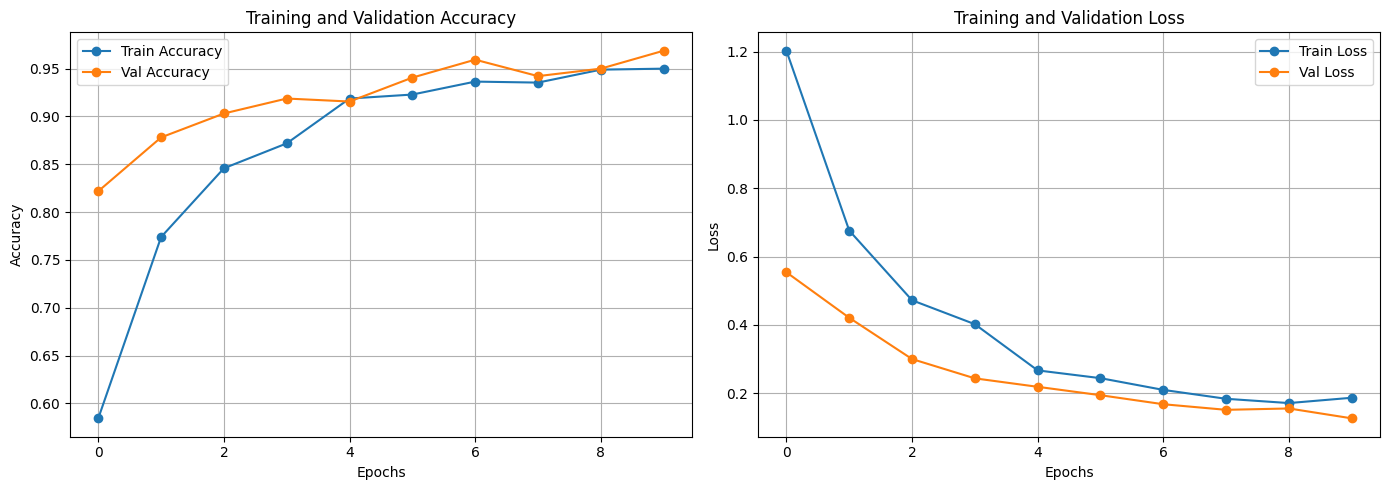

In [6]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy and loss
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(len(acc))

plt.figure(figsize=(14, 5))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Train Accuracy', marker='o')
plt.plot(epochs_range, val_acc, label='Val Accuracy', marker='o')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Train Loss', marker='o')
plt.plot(epochs_range, val_loss, label='Val Loss', marker='o')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


In [9]:
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Use same preprocessing as training
test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

test_generator = test_datagen.flow_from_directory(
    val_dir,  # path to split_80_20/test
    target_size=IMAGE_SIZE,
    batch_size=32,
    class_mode='categorical',
    shuffle=False  # IMPORTANT for predictions to match labels
)


Found 640 images belonging to 8 classes.


In [11]:
# Evaluate performance
loss, accuracy = model.evaluate(test_generator)
print(f"\n✅ Test Accuracy: {accuracy * 100:.2f}%")


20/20 ━━━━━━━━━━━━━━━━━━━━ 30s 2s/step - accuracy: 0.9662 - loss: 0.1455

✅ Test Accuracy: 96.88%


20/20 ━━━━━━━━━━━━━━━━━━━━ 36s 2s/step


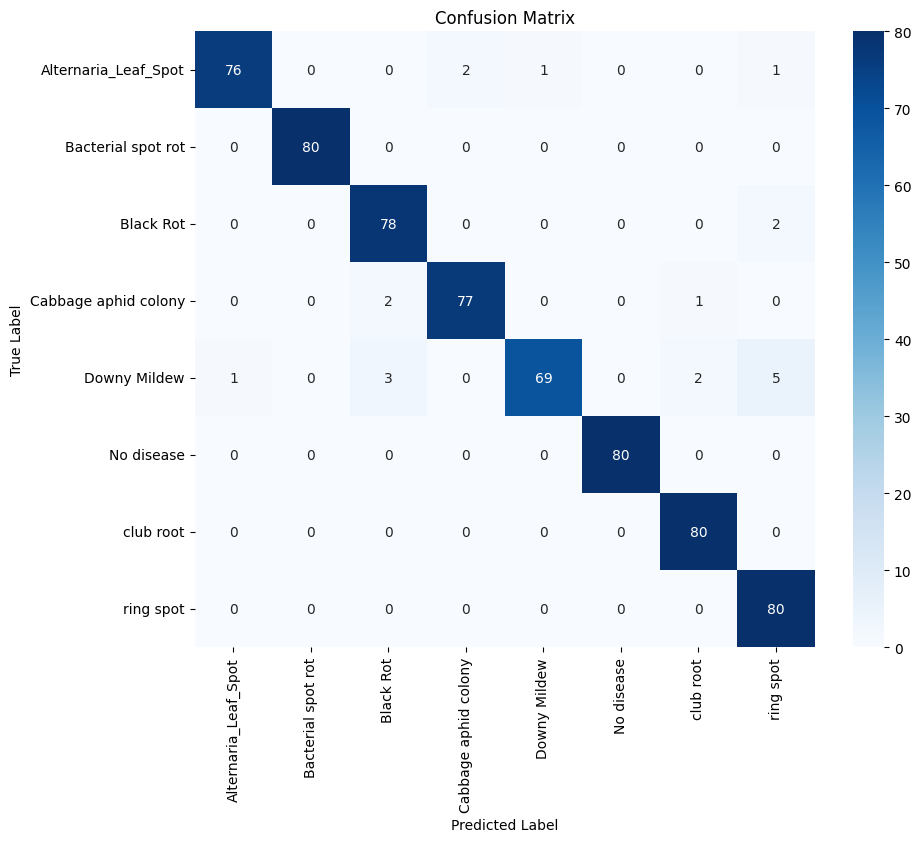


🧾 Classification Report:
                      precision    recall  f1-score   support

Alternaria_Leaf_Spot       0.99      0.95      0.97        80
  Bacterial spot rot       1.00      1.00      1.00        80
           Black Rot       0.94      0.97      0.96        80
Cabbage aphid colony       0.97      0.96      0.97        80
        Downy Mildew       0.99      0.86      0.92        80
          No disease       1.00      1.00      1.00        80
           club root       0.96      1.00      0.98        80
           ring spot       0.91      1.00      0.95        80

            accuracy                           0.97       640
           macro avg       0.97      0.97      0.97       640
        weighted avg       0.97      0.97      0.97       640



In [12]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Predict class probabilities
y_pred_probs = model.predict(test_generator)
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = test_generator.classes
class_labels = list(test_generator.class_indices.keys())

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Classification Report
print("\n🧾 Classification Report:")
print(classification_report(y_true, y_pred, target_names=class_labels))


In [13]:
# Additional Metrics
acc_score = accuracy_score(y_true, y_pred)
prec_macro = precision_score(y_true, y_pred, average='macro')
rec_macro = recall_score(y_true, y_pred, average='macro')
f1_macro = f1_score(y_true, y_pred, average='macro')

print(f"\n✅ Test Accuracy: {acc_score * 100:.2f}%")
print(f"📊 Precision (Macro Avg): {prec_macro:.2f}")
print(f"📊 Recall (Macro Avg): {rec_macro:.2f}")
print(f"📊 F1-score (Macro Avg): {f1_macro:.2f}")

NameError: name 'accuracy_score' is not defined

In [ ]:
import matplotlib.pyplot as plt

# Load a full batch of data
x_batch, y_true_batch = next(test_generator)
y_pred_batch = model.predict(x_batch)
y_pred_labels = np.argmax(y_pred_batch, axis=1)
y_true_labels = np.argmax(y_true_batch, axis=1)

# Class labels
class_labels = list(test_generator.class_indices.keys())

# Show N predictions
N = 5
plt.figure(figsize=(15, 5))
for i in range(N):
    image = x_batch[i]
    true_label = class_labels[y_true_labels[i]]
    pred_label = class_labels[y_pred_labels[i]]
    
    plt.subplot(1, N, i + 1)
    plt.imshow((image + 1) / 2)  # De-normalize if needed
    plt.title(f"True: {true_label}\nPred: {pred_label}")
    plt.axis('off')
plt.tight_layout()
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step


In [12]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.inception_v3 import preprocess_input

# ✅ Class labels from test_generator
class_labels = list(test_generator.class_indices.keys())

# ✅ Function to test one image
def predict_single_image(img_path, model, class_labels):
    try:
        # Load and preprocess image
        img = image.load_img(img_path, target_size=(299, 299))
        img_array = image.img_to_array(img)
        img_array = np.expand_dims(img_array, axis=0)
        img_array = preprocess_input(img_array)

        # Predict
        preds = model.predict(img_array)
        predicted_index = np.argmax(preds)
        predicted_class = class_labels[predicted_index]
        confidence = preds[0][predicted_index]

        # Display
        plt.imshow(img)
        plt.axis('off')
        plt.title(f"Predicted: {predicted_class} ({confidence*100:.2f}%)")
        plt.show()

        print(f"✅ Predicted class: {predicted_class}")
        print(f"📊 Confidence: {confidence * 100:.2f}%")

    except Exception as e:
        print(f"❌ Error loading or processing image: {e}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


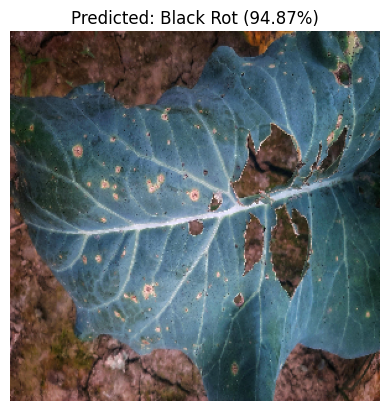

✅ Predicted class: Black Rot
📊 Confidence: 94.87%


In [18]:
predict_single_image(
    "/kaggle/input/my-splits-dataset/split_60_40/test/Black Rot/aug_21.jpg", 
    model, 
    class_labels
)



In [19]:
# === 11. Final Summary Report ===
print(f"\n✅ Final Training Accuracy: {history.history['accuracy'][-1] * 100:.2f}%")
print(f"✅ Final Validation Accuracy: {history.history['val_accuracy'][-1] * 100:.2f}%")
print(f"✅ Final Test Accuracy: {acc_score * 100:.2f}%")
print(f"📊 Macro Precision: {prec_macro:.2f}")
print(f"📊 Macro Recall: {rec_macro:.2f}")
print(f"📊 Macro F1 Score: {f1_macro:.2f}")

# === 12. Model Info & Saving ===
for layer in model.layers:
    if 'InceptionV3' in layer.name:
        print(f"🔍 Base Architecture: InceptionV3 (layer: {layer.name})")
        break

✅ Final Training Accuracy: 95.52%
✅ Final Validation Accuracy: 96.09%
✅ Final Test Accuracy: 96.09%


In [20]:
# Save model in HDF5 format (compatible with most frameworks)
model.save('cauliflower_disease_model.h5')
